In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("DIRTY_DATA_NSE.csv")

In [15]:
df.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,NaN,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [17]:
df.shape

(846404, 13)

In [18]:
df.dtypes

SYMBOL          object
SERIES          object
OPEN           float64
HIGH           float64
LOW            float64
CLOSE          float64
LAST           float64
PREVCLOSE      float64
TOTTRDQTY        int64
TOTTRDVAL      float64
TIMESTAMP       object
TOTALTRADES      int64
ISIN            object
dtype: object

In [19]:
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

In [20]:
df.dtypes

SYMBOL                 object
SERIES                 object
OPEN                  float64
HIGH                  float64
LOW                   float64
CLOSE                 float64
LAST                  float64
PREVCLOSE             float64
TOTTRDQTY               int64
TOTTRDVAL             float64
TIMESTAMP      datetime64[ns]
TOTALTRADES             int64
ISIN                   object
dtype: object

In [21]:
df.isnull().sum()

SYMBOL             0
SERIES             0
OPEN           42320
HIGH           42320
LOW            42320
CLOSE          42320
LAST               0
PREVCLOSE          0
TOTTRDQTY          0
TOTTRDVAL          0
TIMESTAMP          0
TOTALTRADES        0
ISIN               0
dtype: int64

In [ ]:
df["SERIES"] = df["SERIES"].ffill(axis=0)

In [23]:
df["OPEN"].fillna(value=df["OPEN"].mean(), inplace=True)
df["HIGH"].fillna(value=df["HIGH"].mean(), inplace=True)
df["LOW"].fillna(value=df["LOW"].mean(), inplace=True)
df["CLOSE"].fillna(value=df["CLOSE"].mean(), inplace=True)

In [24]:
df.isnull().sum()

SYMBOL         0
SERIES         0
OPEN           0
HIGH           0
LOW            0
CLOSE          0
LAST           0
PREVCLOSE      0
TOTTRDQTY      0
TOTTRDVAL      0
TIMESTAMP      0
TOTALTRADES    0
ISIN           0
dtype: int64

In [26]:
df = df.set_index(df["TIMESTAMP"])

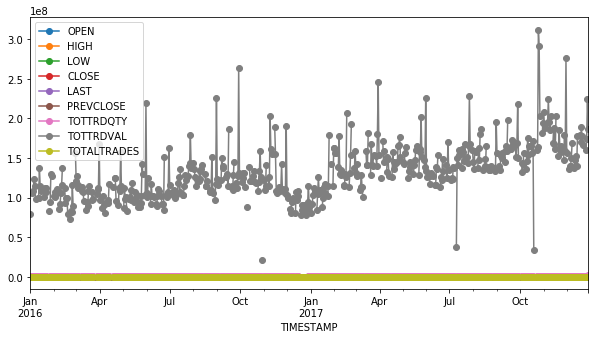

In [27]:
df.resample("D").mean().plot(style="-o", figsize=(10, 5));

In [28]:
df2 = df.resample('W').apply({'OPEN': 'first',
          'HIGH': 'max',
          'LOW': 'min',
          'CLOSE': 'last'})

In [29]:
df2.head()

,OPEN,HIGH,LOW,CLOSE
TIMESTAMP,,,,
2016-01-03,36.00,41424.65,0.05,561.102492
2016-01-10,35.55,41200.05,0.05,5.550000
2016-01-17,34.90,39233.55,0.05,6.950000
2016-01-24,29.80,37950.00,0.05,5.950000
2016-01-31,27.25,38198.95,0.05,4.950000
